<a href="https://colab.research.google.com/github/pranavbharathi/SMARTKNOWER-MINI-PROJECT/blob/master/SmartKnower_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

TOPIC=BIGMART SALES PREDICTION.

In [ ]:
data=pd.read_csv("Train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.shape

(8523, 12)

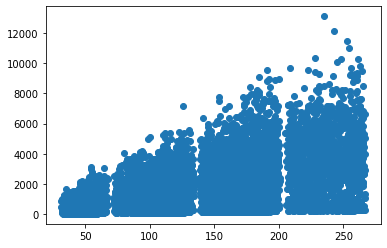

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data['Item_MRP'],data['Item_Outlet_Sales'])
plt.show()

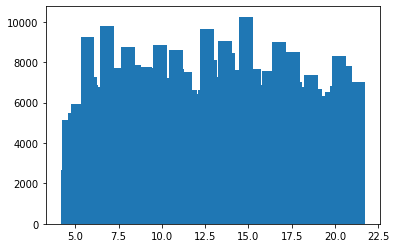

In [ ]:
plt.bar(data['Item_Weight'],data['Item_Outlet_Sales'])
plt.show()

In [ ]:
data=pd.get_dummies(data)

In [ ]:
train=data[0:7999]
test=data[8000:]


In [ ]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,...,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8000,7.02,0.081329,150.0734,2002,4454.2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
8001,7.42,0.020388,247.1092,2004,4233.1564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
8002,17.25,0.113518,253.5724,1997,5033.4480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
8003,18.75,0.052917,190.6504,2002,1342.2528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
8004,20.25,0.018911,220.5772,2007,2446.1492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
x_train=train.drop('Item_Outlet_Sales',axis=1)
y_train=train['Item_Outlet_Sales']
x_test=test.drop('Item_Outlet_Sales',axis=1)
true_p=test['Item_Outlet_Sales']

In [ ]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)


In [ ]:
x_train.shape

(7999, 1604)

In [ ]:
x_train.fillna(0,inplace=True)
x_test.fillna(0,inplace=True)

In [ ]:
lreg.predict(x_test)

array([ 2464.,  3952.,  3904.,  2144.,  4816.,  3072.,  1952.,  2560.,
        3568.,  5392.,  4928.,  1168.,  4208.,   976.,  1744.,   976.,
         592.,   992.,  3536.,  2288.,  2032.,  2240.,  3872.,  5424.,
        1296.,  -800.,  2608.,  2624.,  5088.,  4272.,   688.,   368.,
        1088.,  1616.,  1520.,  2704.,  2976.,  1472.,   688.,  4864.,
        3008.,  1120.,  3728.,   288.,  3504.,  1920.,  3200.,  2640.,
         864.,   704.,  5552.,  2400.,  2528.,  2336.,   192.,  3008.,
        2512.,  1648.,   848.,  3872.,   272.,  2896.,  2528.,  -368.,
        4928.,  2640.,  2768.,  3024.,  2176.,  2672.,  2080.,  2096.,
        3440.,  2160.,  2848.,  2960.,  2336.,  1936.,  3152.,  2512.,
        2704.,  1776.,  2112.,  3024.,  2928.,  1888.,  4304.,  3952.,
        1904.,  3216.,  -688.,   768.,  1520.,  1120.,  -448.,  3088.,
        1248.,   912.,  4384.,  4544.,  3072.,  5008.,  2976.,    64.,
        2384.,  1824.,   864.,   624.,  1568.,  3472.,  -912.,  1056.,
      

In [ ]:
pred=lreg.predict(x_test)

In [ ]:
lreg.score(x_test,true_p)

0.39776975085178157

In [ ]:
lreg.score(x_train,y_train)

0.6484672720106036

In [ ]:
rmse_x=np.sqrt(np.mean(np.power((np.array(true_p)-np.array(pred)),2)))
print(rmse_x)

1260.1168151440372


In [ ]:
rmse_y=np.sqrt(np.mean(np.power((np.array(y_train)-np.array(lreg.predict(x_train))),2)))
print(rmse_y)

1014.8914954600424
